**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: ERICK ALAN CUELLAR QUINTANILLA
*   MATRÍCULA: A01383577

In [111]:
# from google.colab import drive
# drive.mount('/content/drive')

In [112]:
import os
DIR = "C:\Coding\Masters\DataScience\Semana 4\Actividad 4"
os.chdir(DIR)

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
# from sklearn.neighbors import KernelDensity
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

In [114]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [115]:
print('-'*10, 'Método info()','-'*10)
print(df.info())

---------- Método info() ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0

* Hay 8 columnas numéricas (5 enteras y 3 flotantes)
* Hay 4 columnas cualitativas

 2. Determina el porcentaje de valores faltantes por columna.

In [116]:

print('-'*10, '% DE VALORES FALTANTES','-'*10)
print(df.isna().sum() * 100 / len(df))


---------- % DE VALORES FALTANTES ----------
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_int_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [117]:
print('-'*10, 'MEDIA','-'*10)
print(df.mean(numeric_only=True))

---------- MEDIA ----------
person_age                       27.734600
person_income                 66074.848470
person_emp_length                 4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_status                       0.218164
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64


In [118]:
print('-'*10, 'MEDIANA','-'*10)
print(df.median(numeric_only=True))

---------- MEDIANA ----------
person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_status                       0.00
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
dtype: float64


In [119]:
print('-'*10, 'MÁXIMOS','-'*10)
print(df.max(numeric_only=True))

---------- MÁXIMOS ----------
person_age                        144.00
person_income                 6000000.00
person_emp_length                 123.00
loan_amnt                       35000.00
loan_int_rate                      23.22
loan_status                         1.00
loan_percent_income                 0.83
cb_person_cred_hist_length         30.00
dtype: float64


In [120]:
print('-'*10, 'MÍNIMOS','-'*10)
print(df.min(numeric_only=True))

---------- MÍNIMOS ----------
person_age                      20.00
person_income                 4000.00
person_emp_length                0.00
loan_amnt                      500.00
loan_int_rate                    5.42
loan_status                      0.00
loan_percent_income              0.00
cb_person_cred_hist_length       2.00
dtype: float64


In [121]:
print('-'*10, 'DESVIACIÓN ESTÁNDAR','-'*10)
print(df.std(numeric_only=True))

---------- DESVIACIÓN ESTÁNDAR ----------
person_age                        6.348078
person_income                 61983.119168
person_emp_length                 4.142630
loan_amnt                      6322.086646
loan_int_rate                     3.240459
loan_status                       0.413006
loan_percent_income               0.106782
cb_person_cred_hist_length        4.055001
dtype: float64


In [122]:
print('-'*10, 'PRIMER CUARTIL','-'*10)
print(df.quantile(.25, numeric_only=True))

---------- PRIMER CUARTIL ----------
person_age                       23.00
person_income                 38500.00
person_emp_length                 2.00
loan_amnt                      5000.00
loan_int_rate                     7.90
loan_status                       0.00
loan_percent_income               0.09
cb_person_cred_hist_length        3.00
Name: 0.25, dtype: float64


In [123]:
print('-'*10, 'SEGUNDO CUARTIL','-'*10)
print(df.quantile(.5, numeric_only=True))

---------- SEGUNDO CUARTIL ----------
person_age                       26.00
person_income                 55000.00
person_emp_length                 4.00
loan_amnt                      8000.00
loan_int_rate                    10.99
loan_status                       0.00
loan_percent_income               0.15
cb_person_cred_hist_length        4.00
Name: 0.5, dtype: float64


In [124]:
print('-'*10, 'TERCER CUARTIL','-'*10)
print(df.quantile(.75, numeric_only=True))

---------- TERCER CUARTIL ----------
person_age                       30.00
person_income                 79200.00
person_emp_length                 7.00
loan_amnt                     12200.00
loan_int_rate                    13.47
loan_status                       0.00
loan_percent_income               0.23
cb_person_cred_hist_length        8.00
Name: 0.75, dtype: float64


In [125]:
print('-'*10, 'CUARTO CUARTIL','-'*10)
print(df.quantile(1, numeric_only=True))

---------- CUARTO CUARTIL ----------
person_age                        144.00
person_income                 6000000.00
person_emp_length                 123.00
loan_amnt                       35000.00
loan_int_rate                      23.22
loan_status                         1.00
loan_percent_income                 0.83
cb_person_cred_hist_length         30.00
Name: 1.0, dtype: float64


In [126]:
print('-'*10, 'ASIMETRÍA','-'*10)
print(df.skew(numeric_only=True))

---------- ASIMETRÍA ----------
person_age                     2.581393
person_income                 32.865349
person_emp_length              2.614455
loan_amnt                      1.192477
loan_int_rate                  0.208550
loan_status                    1.364888
loan_percent_income            1.064669
cb_person_cred_hist_length     1.661790
dtype: float64


In [127]:
print('-'*10, 'CURTOSIS','-'*10)
print(df.kurt(numeric_only=True))

---------- CURTOSIS ----------
person_age                      18.560825
person_income                 2693.272776
person_emp_length               43.722338
loan_amnt                        1.423565
loan_int_rate                   -0.671609
loan_status                     -0.137088
loan_percent_income              1.223687
cb_person_cred_hist_length       3.716194
dtype: float64


* MISSING POINT

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

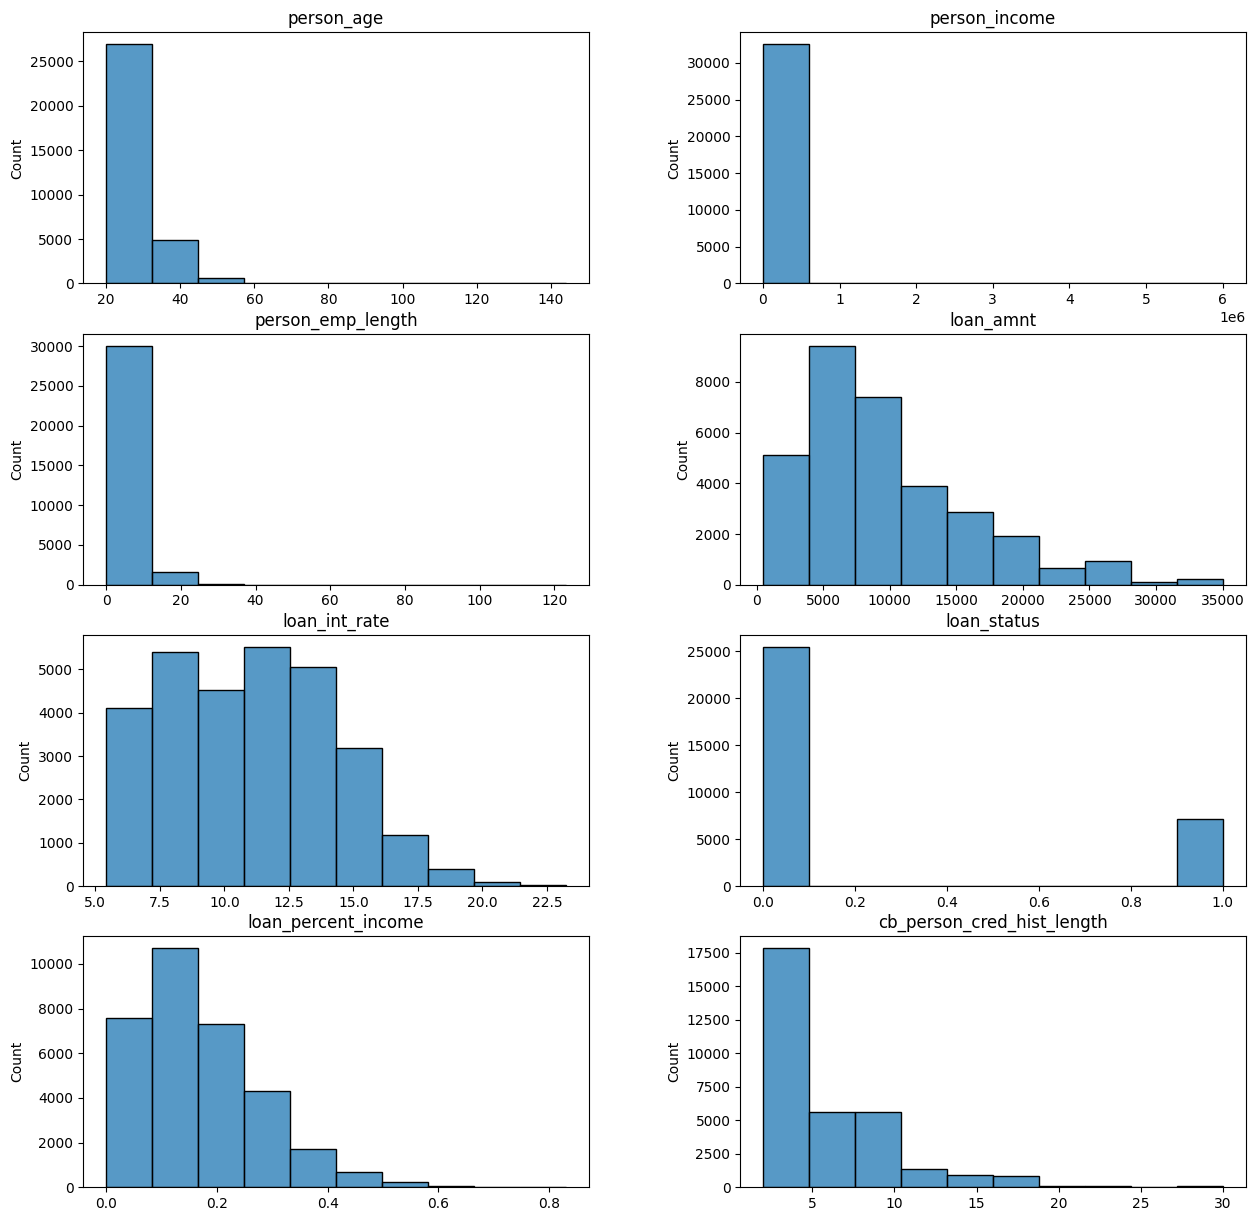

In [128]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Seaborn
fig, axes = plt.subplots(4,2, figsize=(15,15))
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()

for col, ax in zip(df[num_cols], axes):
  sns.histplot(x=df[col], ax=ax, bins=10)
  ax.set(title=f'{col}', xlabel=None) 

# # Matplotlib

# fig, axes = plt.subplots(4,2, figsize=(8,15))
# plt.subplots_adjust(hspace=0.5)
# axes = axes.ravel()
# for col, ax in zip(df[num_cols], axes):
#   # Para poner los valores exactos de los límites de los bins
#   n, bins, edges = ax.hist(df[col])
#   ax.set_xticks(bins)
#   ax.tick_params(axis='x',rotation=90)
#   ax.set(title=f'{col}', xlabel=None)

# # Pandas
# df.hist(figsize=(15,15))


5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

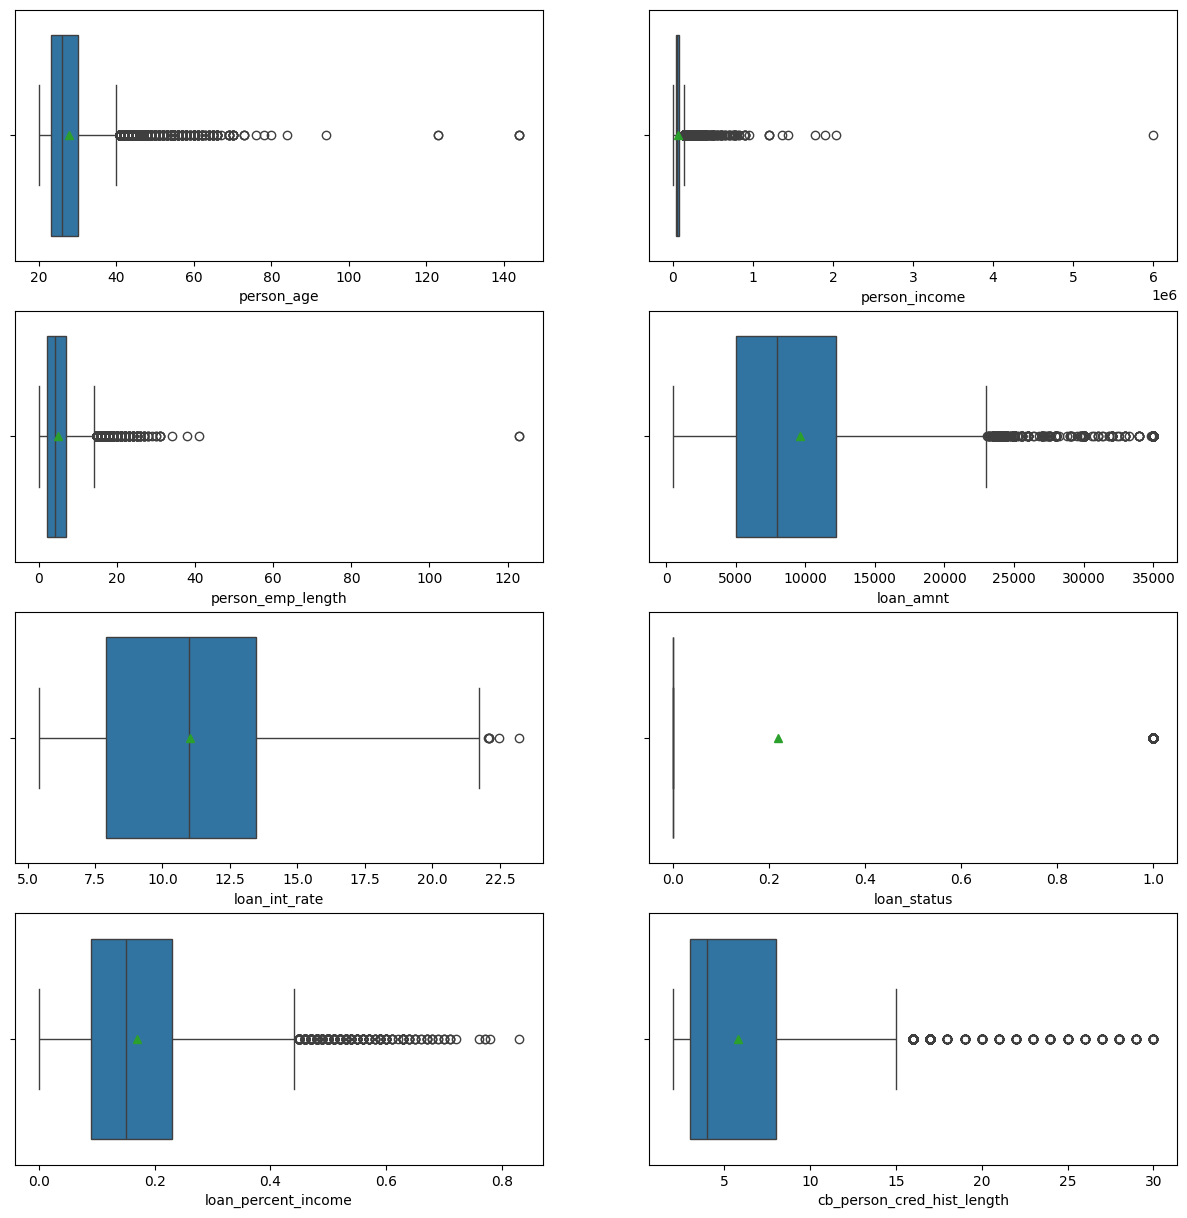

In [129]:
# Seaborn
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.ravel()
for col, ax in zip(df[num_cols], axes):
  sns.boxplot(x=df[col], ax=ax, showmeans=True) 
  ax.set(xlabel=f'{col}')

# # Pandas
# fig, axes = plt.subplots(2,4, figsize=(15,15))
# axes = axes.ravel()
# for col, ax in zip(df[num_cols], axes):
#   df[col].plot(kind='box', ax=ax) 

# Matplotlib
# fig, axes = plt.subplots(2,4, figsize=(15,15))
# axes = axes.ravel()
# for col, ax in zip(df[num_cols], axes):
#   ax.boxplot(df[col], tick_labels=[f'{col}'])

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [130]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [131]:
print('-'*20, 'RESUMEN DE ESTADISTICAS','-'*20)
print(df.describe(include = "object"))

-------------------- RESUMEN DE ESTADISTICAS --------------------
       person_home_ownership loan_intent loan_grade cb_person_default_on_file
count                  32581       32581      32581                     32581
unique                     4           6          7                         2
top                     RENT   EDUCATION          A                         N
freq                   16446        6453      10777                     26836


In [132]:
print('-'*20, 'RECUENTO DE VALORES UNICOS "person_home_ownership"','-'*20)
print(df['person_home_ownership'].value_counts())

-------------------- RECUENTO DE VALORES UNICOS "person_home_ownership" --------------------
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64


In [133]:
print('-'*20, 'RECUENTO DE VALORES UNICOS "loan_intent"','-'*20)
print(df['loan_intent'].value_counts())


-------------------- RECUENTO DE VALORES UNICOS "loan_intent" --------------------
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64


In [134]:
print('-'*20, 'RECUENTO DE VALORES UNICOS "loan_grade"','-'*20)
print(df['loan_grade'].value_counts())


-------------------- RECUENTO DE VALORES UNICOS "loan_grade" --------------------
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64


In [135]:
print('-'*20, 'RECUENTO DE VALORES UNICOS "cb_person_default_on_file"','-'*20)
print(df['cb_person_default_on_file'].value_counts())

-------------------- RECUENTO DE VALORES UNICOS "cb_person_default_on_file" --------------------
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

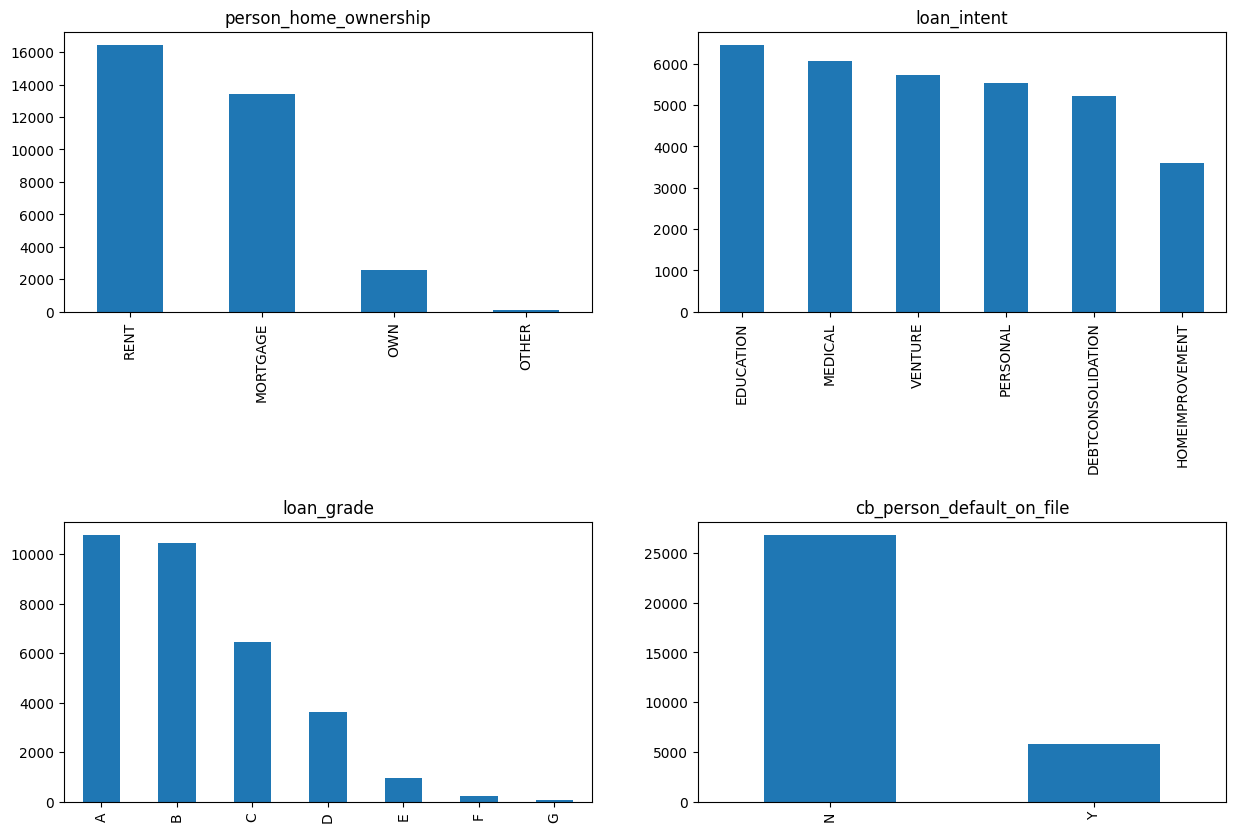

In [136]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

fig, axes = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(hspace=0.75)
axes = axes.ravel()
for col, ax in zip(df[cat_cols], axes):
  df[col].value_counts().plot(kind='bar', ax=ax) # ---> Pandas
  ax.set(title=f'{col}', xlabel=None)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

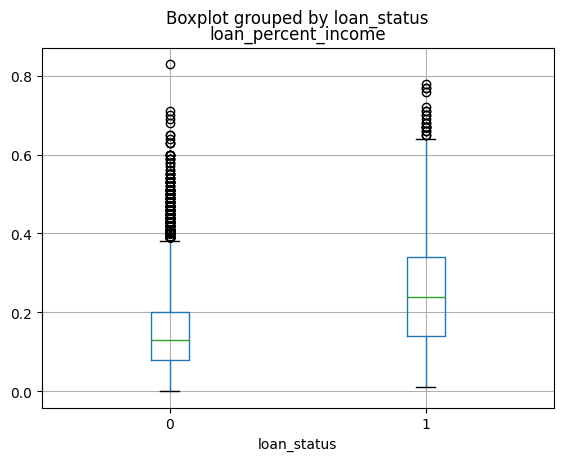

In [137]:
df.boxplot(column='loan_percent_income', by='loan_status')
plt.show()

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `loan_status`, utilizando el parámetro `hue`.

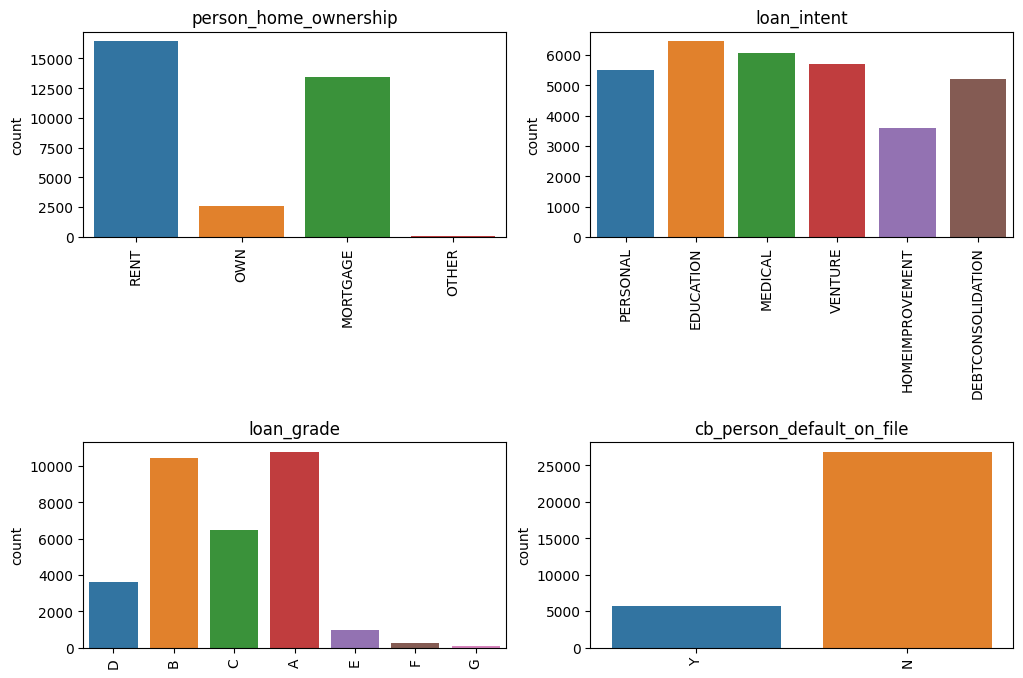

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12,8))
plt.subplots_adjust(hspace=1)
axes = axes.ravel()
for col, ax in zip(df[cat_cols], axes):
  sns.countplot(x=df[col], hue=df[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None)
  ax.tick_params(axis='x',rotation=90)


10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

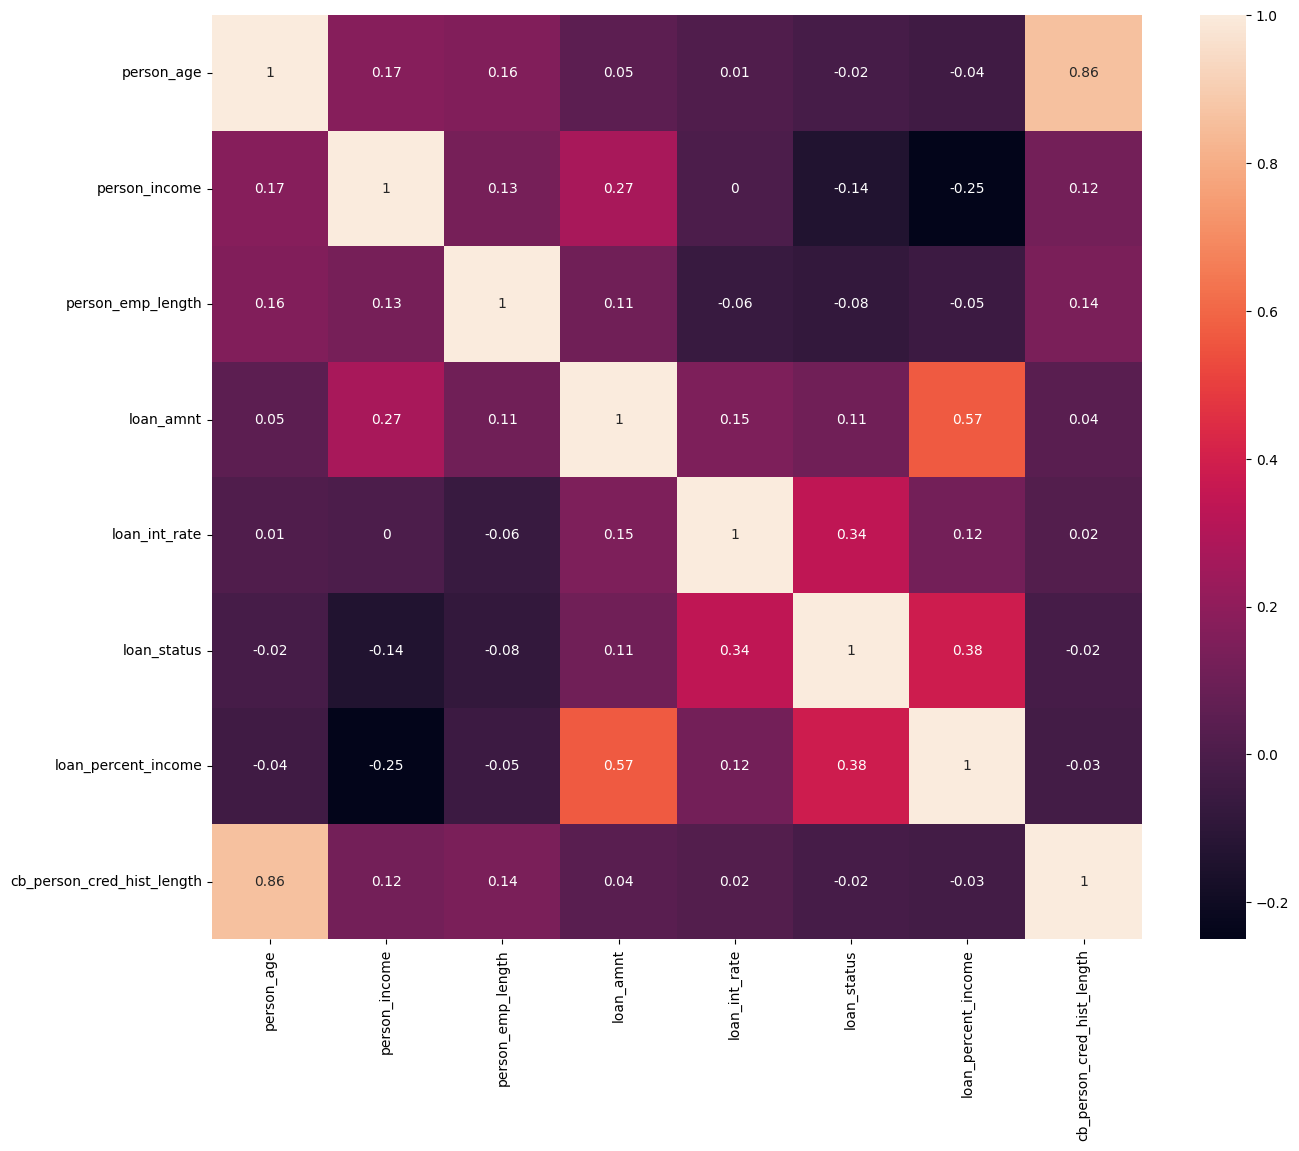

In [ ]:
plt.figure(figsize = (15, 12))
sns.heatmap(round(df.corr(numeric_only=True),2), annot = True)
plt.show()

* La variable que tiene más correlación con 'loan_status' es 'loan_percent_income'.